# General Report

## Setup

In [1]:
from matplotlib.colors import ListedColormap 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from lib import formatting as sd_formatting
import pyodbc 
import toml
import config_logging
import logging
import urllib.request
import pandas as pd
import colorcet as cc
import numpy as np

log = logging.getLogger(__name__)
external_ip = urllib.request.urlopen('https://ident.me').read().decode('utf8')

properties = toml.load("./.streamlit/secrets.toml")

database_props = properties[properties["database"]["flavour"]] 


2022-08-30 21:43:24,565 [INFO] numexpr.utils: NumExpr defaulting to 4 threads.


## Reload

In [4]:
### Set up

%load_ext autoreload
%autoreload 3

from data.daos import dao_facade_local as dao_fac
from lib import db_tools as db_tools
from lib import masters_data_analytics_lib as mlib
from lib import stats as stats

db_conn = None
db_conn = db_tools.get_db_conn(database_props)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-08-30 21:56:48,044 [INFO] lib.db_tools: DATABASE CONNECTIVITY


In [18]:
def df_to_dict_of_lists(df, df_key, df_child_key, list_key_name):
    ret_dict = {}
    ## Create the keys
    unique_df_key_list = borough_list = boroughs_and_wards_df[df_key].unique().tolist()
    
    ## Loop through them
    for unique_df_key in unique_df_key_list:
        child_to_list = df[df[df_key] == unique_df_key][df_child_key].to_list()
        ret_dict[unique_df_key]={list_key_name:child_to_list}

    return ret_dict

boroughs_and_wards_df = dao_fac.boroughs_and_wards(db_conn, None)
# borough_list = boroughs_and_wards_df["BOROUGH"].unique().tolist()
# log.debug(borough_list)

boroughs_and_wards_dict = df_to_dict_of_lists(boroughs_and_wards_df, "BOROUGH", "WARD_NAME", "WARD_NAMES")
log.debug(boroughs_and_wards_dict)

2022-08-30 22:11:14,160 [DEBUG] data.daos.dao_facade_local: {'Barking and Dagenham': {'WARD_NAMES': ['Abbey', 'Alibon', 'Becontree', 'Chadwell Heath', 'Eastbrook', 'Eastbury', 'Gascoigne', 'Goresbrook', 'Heath', 'Longbridge', 'Mayesbrook', 'Parsloes', 'River', 'Thames', 'Valence', 'Village', 'Whalebone']}, 'Barnet': {'WARD_NAMES': ['Brunswick Park', 'Burnt Oak', 'Childs Hill', 'Colindale', 'Coppetts', 'East Barnet', 'East Finchley', 'Edgware', 'Finchley Church End', 'Garden Suburb', 'Golders Green', 'Hale', 'Hendon', 'High Barnet', 'Mill Hill', 'Oakleigh', 'Totteridge', 'Underhill', 'West Finchley', 'West Hendon', 'Woodhouse']}, 'Bexley': {'WARD_NAMES': ['Barnehurst', 'Belvedere', 'Bexleyheath', 'Blackfen & Lamorbey', 'Blendon & Penhill', 'Crayford', 'Crook Log', 'East Wickham', 'Erith', 'Falconwood & Welling', 'Longlands', 'Northumberland Heath', 'Sidcup', 'Slade Green & Northend', "St Mary's & St James", 'Thamesmead East', 'West Heath']}, 'Brent': {'WARD_NAMES': ['Alperton', 'Barnhil

## Search Criteria

In [11]:
city      = "London"
post_code = ""

borough   = "Islington"
ward_name = "Holloway"

## 27% Black African Carribean at Borough Level
borough   = "Lewisham"
ward_name = "Bellingham"

borough   = "Islington"
ward_name = "Holloway"

## 27% Black African Carribean at Borough Level
borough   = "Lewisham"
ward_name = "Bellingham"

borough   = "Barking and Dagenham"
ward_name = "Abbey"

## FEMALE
### HIGH RATION
borough   = "Croydon"
ward_name = "New Addington North"

borough   = "Merton"
ward_name = "Dundonald"


year_from = 2009
year_to   = 2022

#post_code = "SW20 8ED"

search_term = {
    "city"      : city
  , "borough"   : borough
  , "ward_name" : ward_name
  , "post_code" : post_code
  , "year_from" : year_from
  , "year_to"   : year_to
}


# REPORT GENERATION

2022-08-28 14:58:01,895 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:02,275 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:02,276 [DEBUG] managers.sections.sd_report_section_02_Population: <<<<<<<<<<<<<<<<<<
2022-08-28 14:58:02,277 [DEBUG] managers.sections.sd_report_section_02_Population: {'city': 'London', 'borough': 'Merton', 'ward_name': 'Dundonald', 'post_code': '', 'year_from': 2009, 'year_to': 2022, 'oacode': ''}
2022-08-28 14:58:02,278 [DEBUG] managers.sections.sd_report_section_02_Population: <<<<<<<<<<<<<<<<<<
2022-08-28 14:58:02,279 [DEBUG] root: Retrieving population min max year
2022-08-28 14:58:02,322 [DEBUG] managers.sections.sd_report_section_02_Population: population orig_year_to    :2022
2022-08-28 14:58:02,322 [DEBUG] managers.sections.sd_report_section_02_Population: population search_year_to  :2011
2022-08-28 14:58:02,324 [DEBUG] managers.sections.sd_report_section_02_Population: {'year_from': 2011, 'year_to': 2011, 'borough': 'Merton', 

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:03,766 [DEBUG] managers.sections.sd_report_section_02_Population: min_borough_ward_density_pph:7.766666666666667
2022-08-28 14:58:03,766 [DEBUG] managers.sections.sd_report_section_02_Population: max_borough_ward_density_pph:293.08796992481206
2022-08-28 14:58:03,768 [DEBUG] managers.sections.sd_report_section_02_Population: [7.766666666666667, 65.83092731829575, 123.89518796992483, 181.95944862155395, 240.02370927318302, inf]
2022-08-28 14:58:03,790 [DEBUG] managers.sections.sd_report_section_02_Population: min_borough_density_pph:44.87246023949719
2022-08-28 14:58:03,791 [DEBUG] managers.sections.sd_report_section_02_Population: max_borough_density_pph:215.0413051899063
2022-08-28 14:58:03,895 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:03,896 [DEBUG] root: Retrieving ethnicity min max year
2022-08-28 14:58:03,946 [DEBUG] root: ethnicity_ratio_average_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:05,775 [DEBUG] root: ethnicity_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:06,788 [DEBUG] root: ethnicity_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:07,328 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:07,329 [DEBUG] root: Retrieving general health min max year
2022-08-28 14:58:07,411 [DEBUG] managers.sections.sd_report_section_04_General_Health: health orig_year_to    :2022
2022-08-28 14:58:07,412 [DEBUG] managers.sections.sd_report_section_04_General_Health: health search_year_to  :2021
2022-08-28 14:58:07,413 [DEBUG] root: general_health_ratio_average_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:08,051 [DEBUG] root: genearl_health_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:08,748 [DEBUG] root: general_health_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:12,971 [DEBUG] managers.sections.sd_report_section_04_General_Health: Ward more so Green
2022-08-28 14:58:12,971 [DEBUG] managers.sections.sd_report_section_04_General_Health: Borough more so Green
2022-08-28 14:58:12,972 [DEBUG] managers.sections.sd_report_section_04_General_Health: Borough more so Green
2022-08-28 14:58:13,169 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:13,170 [DEBUG] root: Retrieving qualifications min max year
2022-08-28 14:58:13,251 [DEBUG] managers.sections.sd_report_section_05_Education:    MAX_YEAR  MIN_YEAR
0      2011      2011
2022-08-28 14:58:13,252 [DEBUG] managers.sections.sd_report_section_05_Education: education_year_min:2011
2022-08-28 14:58:13,253 [DEBUG] managers.sections.sd_report_section_05_Education: education_year_max:2011
2022-08-28 14:58:13,253 [DEBUG] managers.sections.sd_report_section_05_Education: education orig_year_to    :2022
2022-08-28 14:58:13,255 [DEBUG] managers.sections.sd_report_section_05_Education

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:14,874 [DEBUG] root: education_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:15,823 [DEBUG] root: education_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:16,081 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:16,082 [DEBUG] root: Retrieving earnings min max year
2022-08-28 14:58:16,120 [DEBUG] managers.sections.sd_report_section_06_Earnings:    MAX_YEAR  MIN_YEAR
0      2021      2010
2022-08-28 14:58:16,122 [DEBUG] managers.sections.sd_report_section_06_Earnings: earnings orig_year_to    :2022
2022-08-28 14:58:16,123 [DEBUG] managers.sections.sd_report_section_06_Earnings: earnings search_year_to  :2021
2022-08-28 14:58:16,124 [DEBUG] root: retrieving uk earnings year
2022-08-28 14:58:16,169 [DEBUG] root: Retrieving Crime Ranked By Borough Years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:58:16,716 [DEBUG] managers.sections.sd_report_section_06_Earnings: [[26432.0, 26770.0, 26835.0, 27206.0, 26755.0, 26867.0, 28752.0, 29316.0, 34200.0, 34372.0, 31768.0, 33742.0]]
2022-08-28 14:58:16,717 [DEBUG] managers.sections.sd_report_section_06_Earnings: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
2022-08-28 14:58:19,053 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-08-28 14:58:19,054 [DEBUG] root: Retrieving crime min max year
2022-08-28 14:58:19,116 [DEBUG] managers.sections.sd_report_section_07_Crime: 2001
2022-08-28 14:58:19,117 [DEBUG] managers.sections.sd_report_section_07_Crime: 2022
2022-08-28 14:58:19,118 [DEBUG] managers.sections.sd_report_section_07_Crime: earnings orig_year_to    :2022
2022-08-28 14:58:19,119 [DEBUG] managers.sections.sd_report_section_07_Crime: earnings search_year_to  :2022
2022-08-28 14:58:19,119 [DEBUG] managers.sections.sd_report_section_07_Crime: QRY Started
2022-08-28 14:58:19,120 [DEBUG] root: Retriev

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:59:03,097 [DEBUG] managers.sections.sd_report_section_07_Crime: QRY Ended
2022-08-28 14:59:03,099 [DEBUG] root: city_population
2022-08-28 14:59:03,135 [DEBUG] root: city_population


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:59:04,892 [DEBUG] root: Retrieving Crim Major categories top 5 for borough in year


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-08-28 14:59:24,128 [DEBUG] selenium.webdriver.remote.remote_connection: POST http://localhost:62955/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "pageLoadStrategy": "normal", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--headless", "-no-sandbox", "--disable-dev-shm-usage"]}}}, "desiredCapabilities": {"browserName": "chrome", "pageLoadStrategy": "normal", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--headless", "-no-sandbox", "--disable-dev-shm-usage"]}}}
2022-08-28 14:59:24,129 [DEBUG] urllib3.connectionpool: Starting new HTTP connection (1): localhost:62955
2022-08-28 14:59:25,064 [DEBUG] urllib3.connectionpool: http://localhost:62955 "POST /session HTTP/1.1" 200 793
2022-08-28 14:59:25,065 [DEBUG] selenium.webdriver.remote.remote_connection: Finished Request
Browser is loading ./reports/generation/images/REPORT_TYPE_01_GENERAL_map_London_Merton_Dundonald_.html
2022-08-28 14:59:25,067 [DEBUG] sele

'./reports/generation/documents//REPORT_TYPE_01_GENERAL_sd_general_report_template.new.01.02.docx'

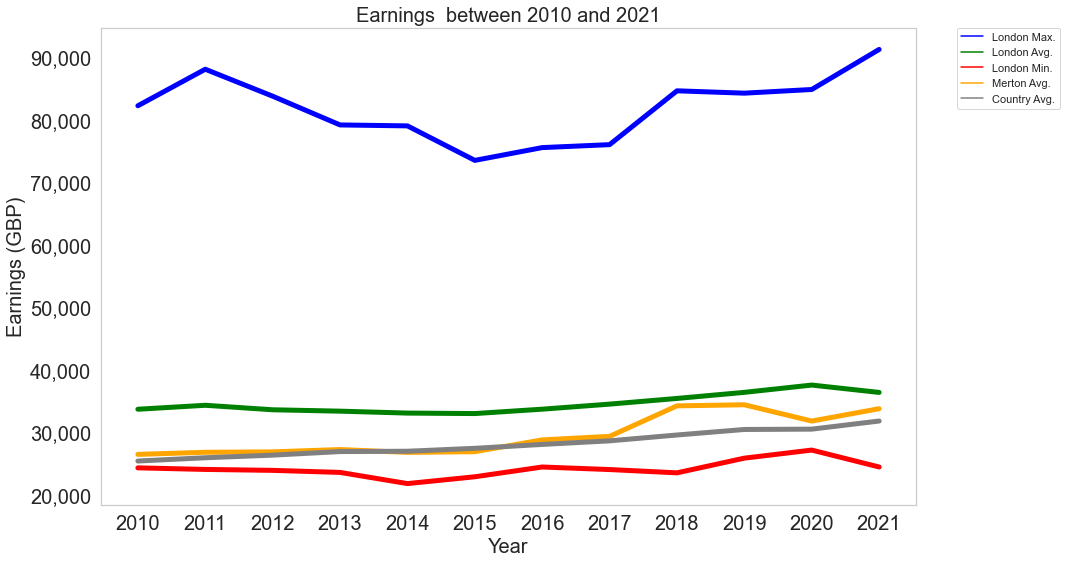

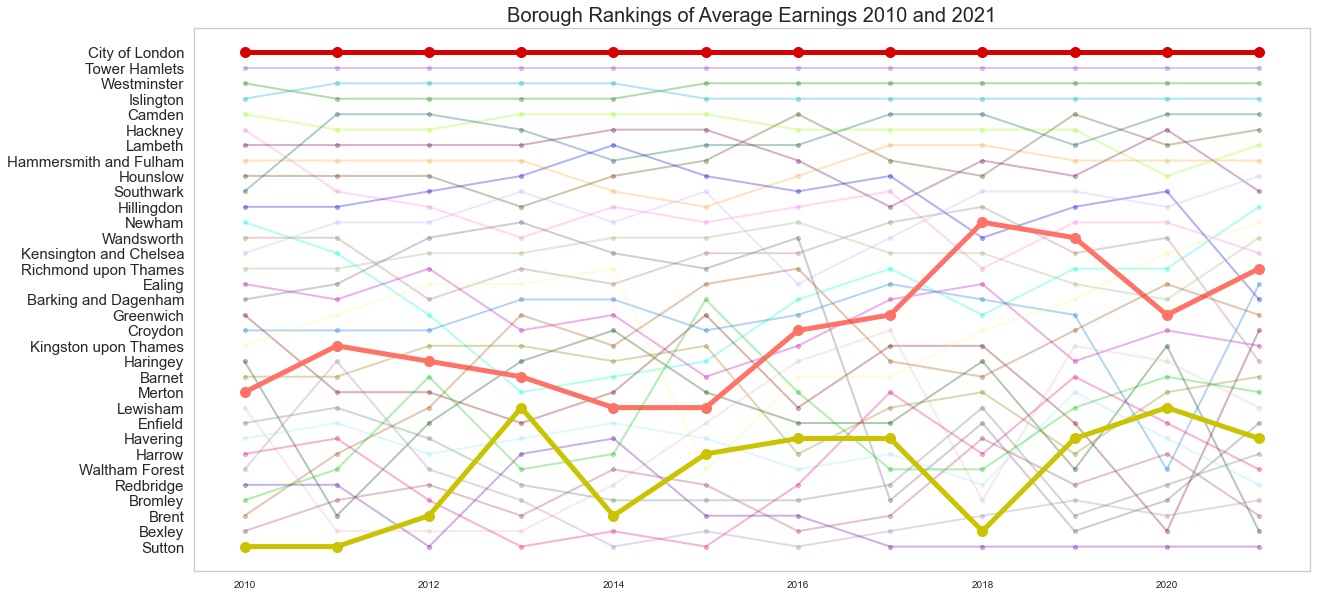

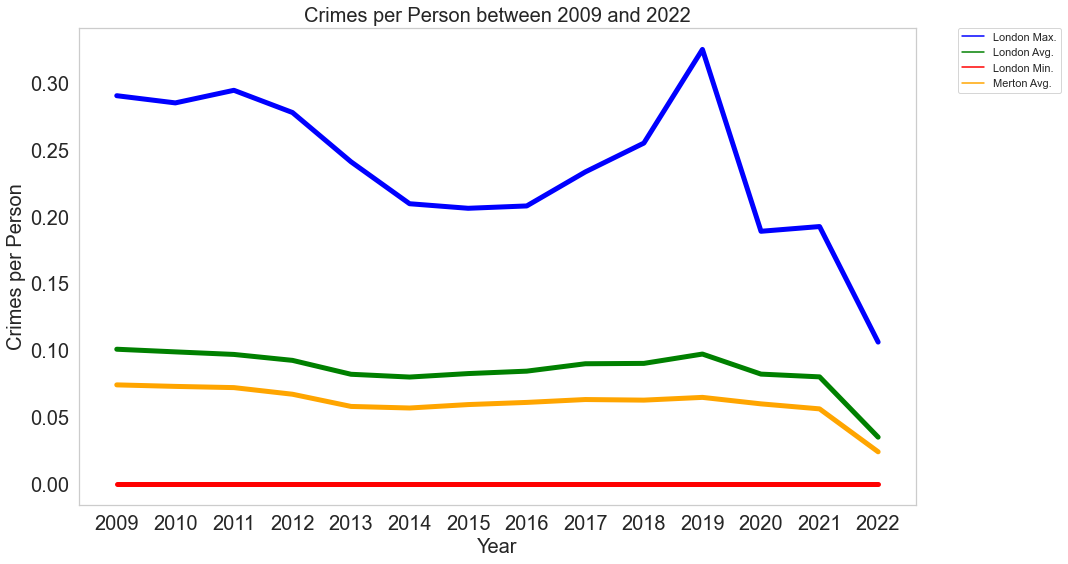

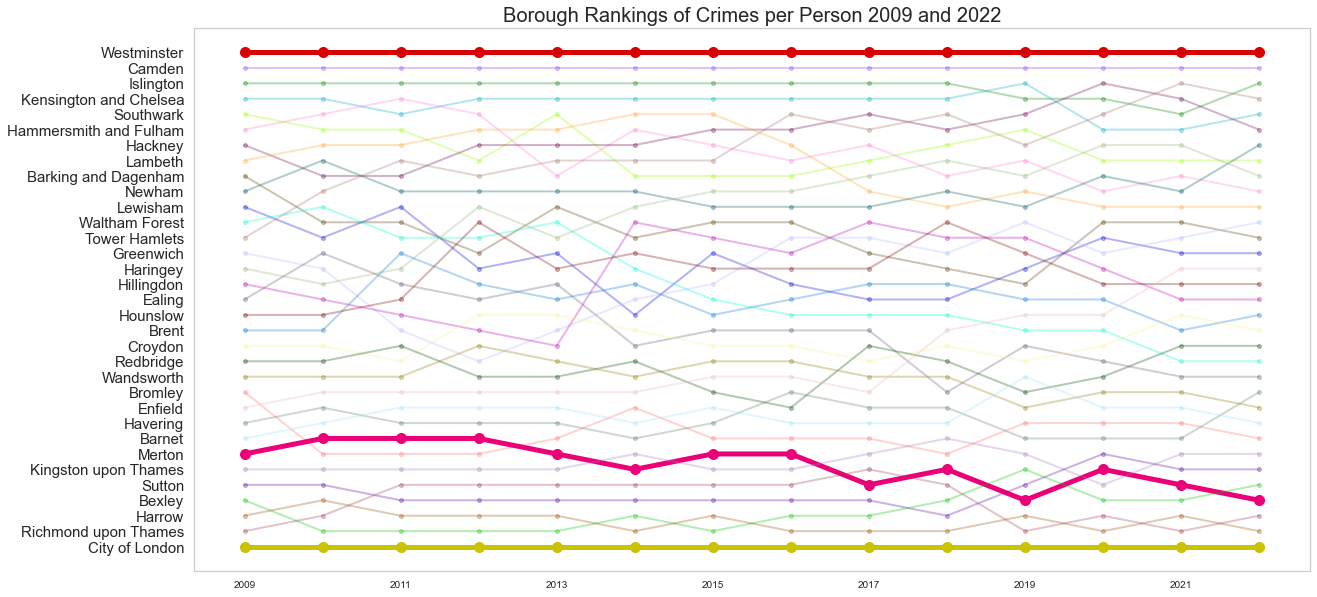

In [13]:
from managers import sd_report_type_general_new as report_general_man

session_id = "REPORT_TYPE_01_GENERAL"
template_processor_file_name = "./reports/processors/sd_general_report_template_processor_dev.json"
report_option = "Full"

## Create the report context
report_context = {}
report_context["template_processor_file_name"] = template_processor_file_name
report_context["report_option"] = report_option
report_context[""] = False

report_general_man.generate_report(session_id
                                 , search_term
                                 , report_context
                                 , properties)


